In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


### Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [10]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/dp/B0CDSCM9BN/ref=syn_sd_onsite_desktop_0?ie=UTF8&pd_rd_plhdr=t&th=1')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [11]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,Reviewed in India on 17 October 2022
1,4.0 out of 5 stars\nnice product,4.0,I love about this watch is how easy it is to u...,Reviewed in India on 25 August 2023
2,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 April 2023
3,4.0 out of 5 stars\nNice work,4.0,Yes,Reviewed in India on 18 August 2023
4,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 August 2022
...,...,...,...,...
246,5.0 out of 5 stars\nGood,5.0,Nice 👍🏼 in budget\nRead more,Reviewed in India on 8 September 2023
247,5.0 out of 5 stars\nValue for money,5.0,Good product\nRead more,Reviewed in India on 8 September 2023
248,5.0 out of 5 stars\nHappy,5.0,Great product\nRead more,Reviewed in India on 8 September 2023
249,5.0 out of 5 stars\nLooks Good 👍🏻,5.0,Looks 👍🏻\nRead more,Reviewed in India on 8 September 2023


In [12]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)


In [13]:
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nnice product,4.0,I love about this watch is how easy it is to u...,25 August 2023
2,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
3,4.0 out of 5 stars\nNice work,4.0,Yes,18 August 2023
4,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
5,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",14 August 2022
6,3.0 out of 5 stars\nGood product,3.0,"Overall it's a good product,Positives:-Amazing...",25 August 2022
7,3.0 out of 5 stars\nGood but could have been b...,3.0,"Pros:1. Amoled Display is super, usable at ver...",24 November 2022
8,4.0 out of 5 stars\nAll good except for few th...,4.0,What all is good you can know from other comme...,15 November 2022
9,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023


In [14]:
df.to_csv("beatXP_Review.csv")

In [15]:
reviews = pd.read_csv('beatXP_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nnice product,4.0,I love about this watch is how easy it is to u...,25 August 2023
2,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
3,4.0 out of 5 stars\nNice work,4.0,Yes,18 August 2023
4,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
...,...,...,...,...
246,5.0 out of 5 stars\nGood,5.0,Nice 👍🏼 in budget\nRead more,8 September 2023
247,5.0 out of 5 stars\nValue for money,5.0,Good product\nRead more,8 September 2023
248,5.0 out of 5 stars\nHappy,5.0,Great product\nRead more,8 September 2023
249,5.0 out of 5 stars\nLooks Good 👍🏻,5.0,Looks 👍🏻\nRead more,8 September 2023


### Data Exploration

In [16]:
reviews.Rating.describe()

count    251.000000
mean       3.992032
std        1.359388
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        251 non-null    object 
 1   Rating       251 non-null    float64
 2   Review       251 non-null    object 
 3   Review_Date  251 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.0+ KB


In [18]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [19]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nnice product,4.0,I love about this watch is how easy it is to u...,25 August 2023
2,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
3,4.0 out of 5 stars\nNice work,4.0,Yes,18 August 2023
4,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022


## Data Visualization

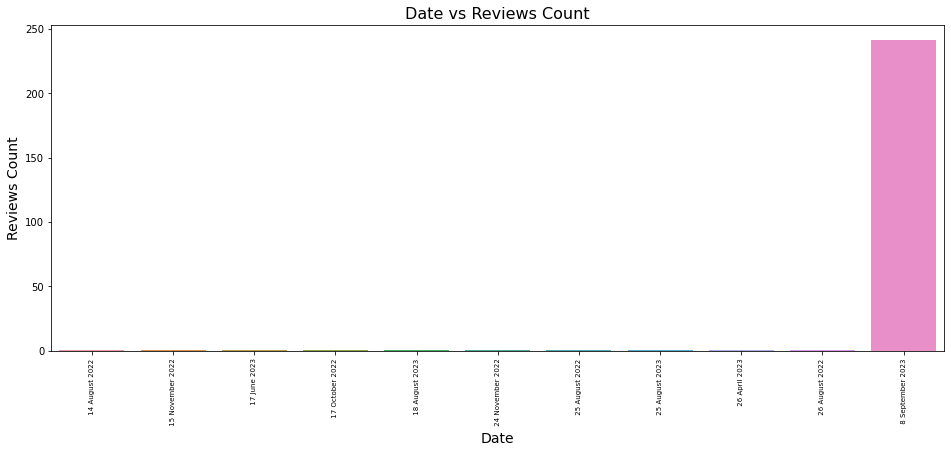

In [22]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

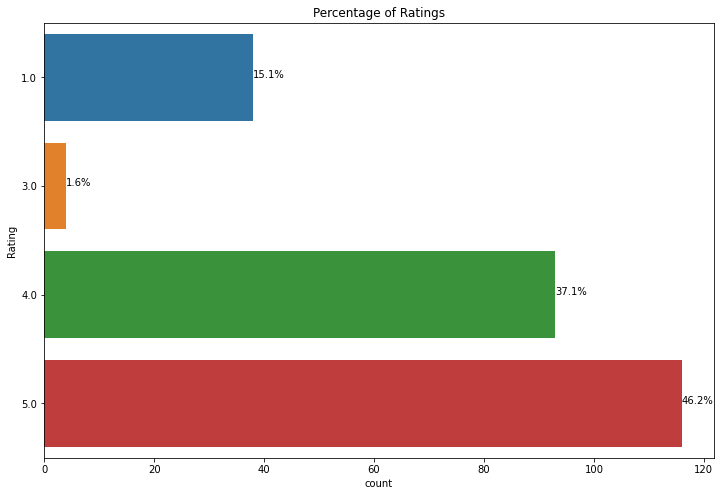

In [23]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### BasicText preprocessing for Sentiment Analysis

In [24]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The media could not be loaded.\n              ...
1    I love about this watch is how easy it is to u...
2    The media could not be loaded.\n              ...
3                                                  Yes
4    The media could not be loaded.\n              ...
Name: Review, dtype: object

In [25]:
beatXP_review=reviews[['Review']]
beatXP_review

,Review
0,The media could not be loaded.\n ...
1,I love about this watch is how easy it is to u...
2,The media could not be loaded.\n ...
3,Yes
4,The media could not be loaded.\n ...
...,...
246,Nice 👍🏼 in budget\nRead more
247,Good product\nRead more
248,Great product\nRead more
249,Looks 👍🏻\nRead more


In [26]:
beatXP_review.reset_index(drop=True, inplace=True)

In [28]:
stop_words = stopwords.words('english')
beatXP_review['Review'] = beatXP_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


### Lemmatizer

In [30]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(beatXP_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", beatXP_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/251 [00:00<?, ?it/s]

In [31]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": beatXP_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...


In [32]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [33]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
9,quality feature watch good,the quality features watch good.


In [34]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
9,quality feature watch good,the quality features watch good.


In [35]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
9,quality feature watch good,the quality features watch good.


In [36]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
9,quality feature watch good,the quality features watch good.


In [37]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [38]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
9,quality feature watch good,the quality features watch good.


In [39]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [40]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [41]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
3,yes,yes
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
9,quality feature watch good,the quality features watch good.


In [42]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['love', 'watch', 'easy', 'use', 'touch', 'screen', 'responsive', 'various', 'feature', 'easy', 'navigate', 'particularly', 'appreciate', 'fitness', 'tracking', 'capability', 'allow', 'monitor', 'daily', 'step', 'heart', 'rate', 'health', 'metric'])

In [43]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [medium, could, loaded, hello, good, day, fan,...
1    [love, watch, easy, use, touch, screen, respon...
2    [medium, could, loaded, boat, extend, pro, rev...
3                                                [yes]
4    [medium, could, loaded, got, watch, today, che...
5    [first, look, feel, th, august, good, packing,...
6    [overall, good, product, positive, amazing, br...
7    [pro, amoled, display, super, usable, low, low...
8    [good, know, comment, youtube, let, come, con,...
9                      [quality, feature, watch, good]
Name: Clean_Reviews, dtype: object

In [44]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,..."
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...,"[love, watch, easy, use, touch, screen, respon..."
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...,"[medium, could, loaded, boat, extend, pro, rev..."
3,yes,yes,[yes]
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che..."
5,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe...","[first, look, feel, th, august, good, packing,..."
6,overall good product positive amazing bright s...,"overall good product,positives:-amazing bright...","[overall, good, product, positive, amazing, br..."
7,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b...","[pro, amoled, display, super, usable, low, low..."
8,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...,"[good, know, comment, youtube, let, come, con,..."
9,quality feature watch good,the quality features watch good.,"[quality, feature, watch, good]"


In [45]:
stemmer = SnowballStemmer("english")

In [46]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,medium could load hello good day fan boat devi...
1,love watch easi use touch screen respons vario...
2,medium could load boat extend pro reviewshyam ...
3,yes
4,medium could load got watch today check featur...
...,...
246,nice budget read
247,good product read
248,great product read
249,look read


In [47]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,medium could loaded hello good day fan boat de...
1,love watch easy use touch screen responsive va...
2,medium could loaded boat extend pro reviewshya...
3,yes
4,medium could loaded got watch today checked fe...
...,...
246,nice budget read
247,good product read
248,great product read
249,look read


## Basic Feature Extraction

In [48]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [49]:
print(cv.get_feature_names()[109:200])

['comprehensive', 'con', 'concl', 'condition', 'connect', 'connected', 'consider', 'contact', 'continuously', 'control', 'cooked', 'correct', 'could', 'count', 'counter', 'crest', 'crown', 'crystal', 'current', 'currently', 'custom', 'customer', 'customisation', 'customise', 'customised', 'cycle', 'cycling', 'daily', 'data', 'date', 'day', 'deal', 'decided', 'decrease', 'default', 'definitely', 'demerit', 'design', 'designed', 'detail', 'device', 'dial', 'dialer', 'difficult', 'difficulty', 'disappointed', 'display', 'displaying', 'displayits', 'displayui', 'dissapointing', 'divert', 'dnd', 'doesnt', 'done', 'double', 'download', 'dp', 'drain', 'drop', 'easy', 'echo', 'editing', 'effective', 'either', 'else', 'enable', 'enabled', 'energy', 'enjoyed', 'enough', 'enthusiast', 'even', 'ever', 'every', 'excellent', 'except', 'expectation', 'extend', 'extended', 'face', 'facebook', 'fan', 'far', 'feature', 'feedback', 'feel', 'felt', 'find', 'fine', 'firmware']


In [50]:
print(cv.get_feature_names()[:100])

['able', 'accept', 'accepted', 'according', 'accuracy', 'accurate', 'active', 'activity', 'add', 'adding', 'addition', 'adjustment', 'affordable', 'afternoon', 'afterwards', 'ahead', 'ai', 'alarm', 'alert', 'allow', 'allows', 'also', 'always', 'amazing', 'amoled', 'android', 'annoying', 'answer', 'answered', 'anyone', 'aod', 'app', 'appbattery', 'appfind', 'appreciate', 'apps', 'apt', 'around', 'asap', 'assistant', 'attach', 'attached', 'attended', 'audible', 'audio', 'august', 'auto', 'automatically', 'available', 'average', 'back', 'background', 'backup', 'backupwith', 'bad', 'based', 'battery', 'best', 'better', 'biggest', 'bit', 'bluetooth', 'boat', 'bought', 'box', 'bpm', 'brand', 'bright', 'brightness', 'broken', 'bt', 'budget', 'bug', 'bugle', 'build', 'button', 'buy', 'buying', 'calculate', 'calculates', 'calculator', 'call', 'callertune', 'calling', 'callyou', 'camera', 'cannot', 'cant', 'capability', 'case', 'change', 'charge', 'charging', 'checked', 'choice', 'claimed', 'cla

In [51]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
dataframe = dataframe.reset_index(drop=True)

### TF-IDF Vectorizer

In [53]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/251 [00:00<?, ?it/s]

In [54]:
corpus[3]

'ye'

In [57]:
cv = CountVectorizer(max_features=251,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [58]:
X.shape

(251, 251)

In [59]:
cv.get_feature_names()[:20]

['activ',
 'also',
 'also manual',
 'also manual show',
 'alway',
 'alway display',
 'alway display miss',
 'alway display use',
 'app',
 'app bit',
 'app bit clumsi',
 'app current',
 'app current display',
 'app one',
 'app one class',
 'app seem',
 'app seem averag',
 'audio',
 'avail',
 'avail read']

In [60]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 251,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [61]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,activ,also,also manual,also manual show,alway,alway display,alway display miss,alway display use,app,app bit,...,weather,whether,whether updat,whether updat get,whether watch,whether watch featur,wise,wise good,wise good read,work
0,0,3,0,0,3,2,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,5,0,...,4,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/251 [00:00<?, ?it/s]

In [63]:
corpus[4]

'medium could load got watch today check featur one one download boat crest app pair spo measur time heart rate take quit time live score live score sport enabl app bluetooth call bt work great use dialer call manual sync contact phone call phonebook microphon work fine proxim level mouth watch around cm far person might face difficulti hear voic speaker impress sound crystal clear without echo lag overal call featur step record step count pretti accur record step walk notif show notif info upto line notif facebook whatsapp e mail receiv app one demerit found watch need fix provis enabl notif much app want made timer default timer minut respect custom timer provis also flashlight bright white background come interfac click flashlight option definit effect phone flash work fine alarm set mani alarm want weather know problem unabl see weather info watch tri pair unpair turn weather set noth work batteri got watch batteri hour sinc use time bluetooth call upto averag time per call still b

In [64]:
tfidf_v = TfidfVectorizer(max_features=251,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [65]:
X.shape

(251, 251)

In [66]:
tfidf_v.get_feature_names()[:20]

['activ',
 'also',
 'also manual',
 'also manual show',
 'alway',
 'alway display',
 'alway display miss',
 'alway display use',
 'app',
 'app bit',
 'app bit clumsi',
 'app current',
 'app current display',
 'app one',
 'app one class',
 'app seem',
 'app seem averag',
 'audio',
 'avail',
 'avail read']

In [67]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 251,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [68]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,activ,also,also manual,also manual show,alway,alway display,alway display miss,alway display use,app,app bit,...,weather,whether,whether updat,whether updat get,whether watch,whether watch featur,wise,wise good,wise good read,work
0,0.000000,0.097396,0.0,0.0,0.092125,0.061417,0.0,0.0,0.101838,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.091063,0.106343,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.091404,0.0,0.0,0.000000,0.000000,0.0,0.0,0.179200,0.0,...,0.330593,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.299497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
247,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
248,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
249,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [71]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'medium could loaded hello good day fan boat device recently purchased smart watch brand thought put feedback improved possible via software update volume able increase decrease call notification smart watch unable find setting either watch appfind phone option find watch app use gonna vibrate instead using speaker better locating watch rotating dial dial watch rotates right purpose rotating scrolling option button would better optionnotification adding app option notification section available apps using call display option call call display always displaying whomever ever im speaking phone getting notification watch fine second display continuously nearly minute call want watch battery drain unnecessarily also want anyone see speaking left handed pick call left hand time see speaking second enough rather call audio divert pick phone phone voice call audible phone otherwise use picking call phone audio come watch answer call watch ideal time divert audio call watch otherwise make sens

### Parts of Speech Tagging

In [72]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [73]:
for token in doc_block[:50]:
    print(token,token.pos_)

medium NOUN
could AUX
loaded VERB
hello INTJ
good ADJ
day NOUN
fan NOUN
boat NOUN
device NOUN
recently ADV
purchased VERB
smart ADJ
watch NOUN
brand NOUN
thought VERB
put VERB
feedback NOUN
improved VERB
possible ADJ
via ADP
software NOUN
update NOUN
volume NOUN
able ADJ
increase NOUN
decrease NOUN
call NOUN
notification NOUN
smart ADJ
watch NOUN
unable ADJ
find NOUN
setting VERB
either CCONJ
watch VERB
appfind NOUN
phone NOUN
option NOUN
find VERB
watch VERB
app NOUN
use NOUN
gon VERB
na PART
vibrate VERB
instead ADV
using VERB
speaker NOUN
better ADV
locating VERB


In [74]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['come', 'watch', 'answer', 'call', 'watch', 'time', 'divert', 'audio', 'call', 'watch', 'make', 'sense', 'watch', 'face', 'watch', 'face', 'look', 'seems', 'using', 'face', 'watch', 'theme', 'amoled', 'display', 'provide', 'display', 'face', 'watch', 'add', 'option', 'user', 'customise', 'according', 'need', 'provide', 'face', 'watch', 'option', 'display', 'thing', 'done', 'nudge', 'option', 'use', 'optionsnotification', 'panel', 'get', 'notification', 'apps', 'fine', 'attended', 'removed', 'notification', 'phone', 'notification', 'removed', 'watch', 'notification', 'panel', 'staying', 'removing', 'device', 'way', 'remove', 'notification', 'smartwatch', 'stress', 'sensor', 'energy', 'meter', 'calculate', 'stress', 'energy', 'person', 'reason', 'consider', 'show', 'fitness', 'plan', 'want', 'gain', 'weight', 'tell', 'run', 'make', 'sense', 'running', 'going', 'help', 'gain', 'weight', 'dp', 'provides', 'use', 'customer', 'buying', 'watch', 'make', 'use', 'remove']


### Counting Nouns & verb tokens

In [75]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,read,241
1,watch,230
2,feature,163
3,display,105
4,app,96
5,product,89
6,call,84
7,face,66
8,lack,58
9,option,46


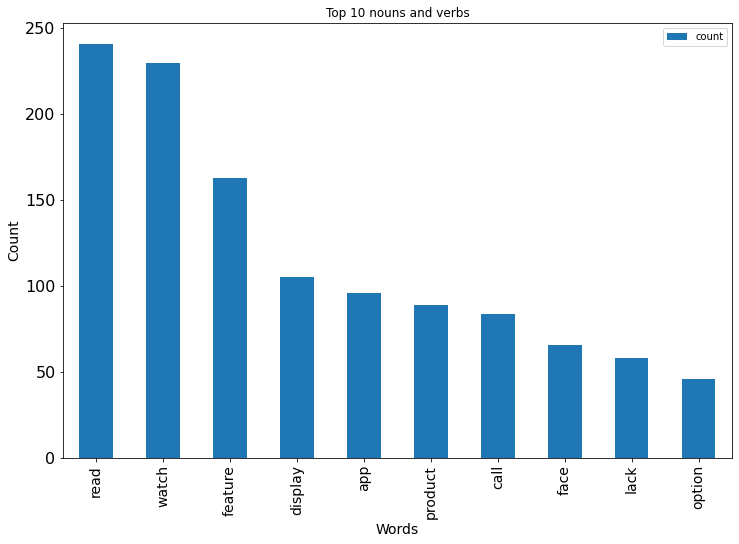

In [76]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [77]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


In [78]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [79]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'


In [80]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())


,Clean_Reviews
pos,251


In [81]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...,"[love, watch, easy, use, touch, screen, respon...",0.516667,0.255556
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...,"[medium, could, loaded, boat, extend, pro, rev...",0.467800,0.225170
3,yes,yes,[yes],0.000000,0.000000
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325


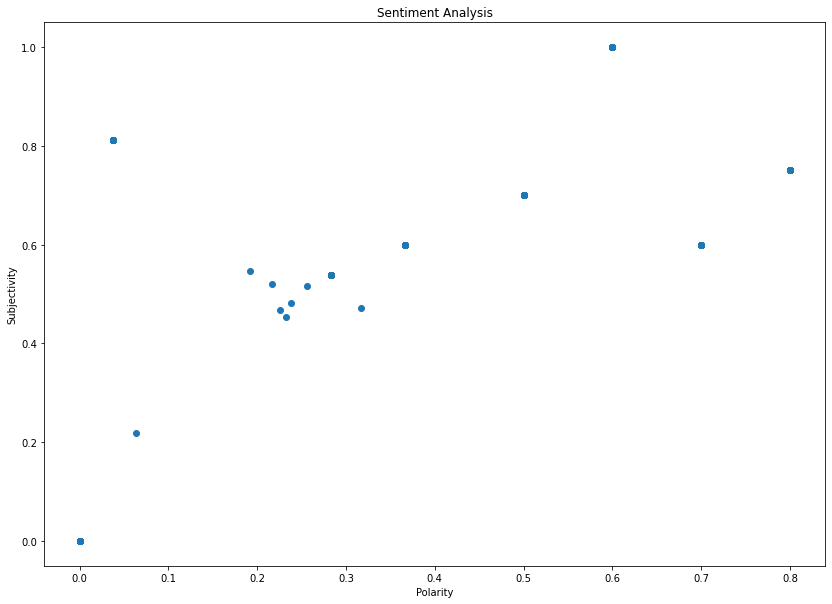

In [82]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [83]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312,pos
1,love watch easy use touch screen responsive va...,i love watch easy use. the touch screen respon...,"[love, watch, easy, use, touch, screen, respon...",0.516667,0.255556,pos
2,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...,"[medium, could, loaded, boat, extend, pro, rev...",0.467800,0.225170,pos
3,yes,yes,[yes],0.000000,0.000000,pos
4,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325,pos


### Story Generation and Visualization

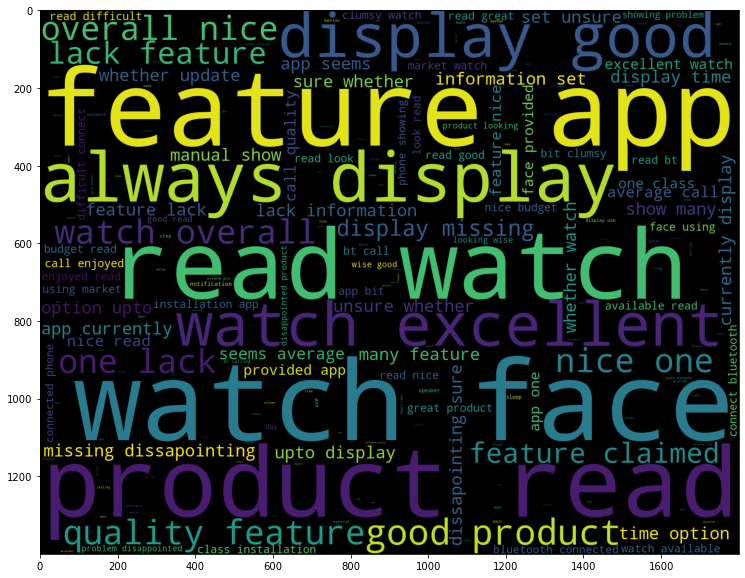

In [84]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### Most common words in positive Review

In [85]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

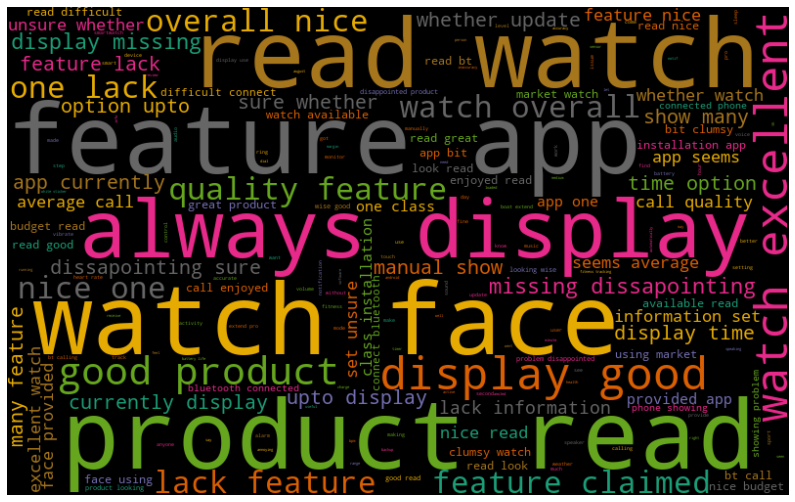

In [87]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)